In [1]:
import torch
import math
import matplotlib.pyplot as plt
import torch.nn.functional as F

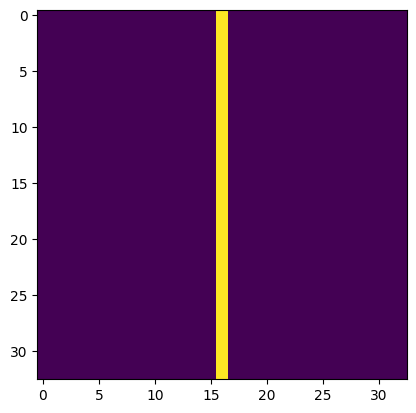

In [27]:
patch_size = 33
assert patch_size % 2 == 1, "Patch size must be odd."
patch = torch.zeros((patch_size, patch_size))
patch[:, patch_size // 2] = 1
patch = patch / patch.sum()
plt.imshow(patch)

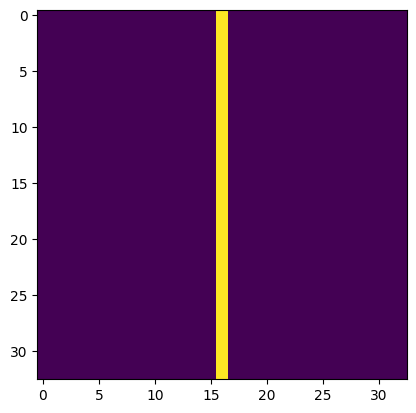

In [28]:

# padding = math.ceil(patch.shape[0] * (math.sqrt(2) - 1) / 2)
# patch = torch.nn.functional.pad(patch, (padding, padding, padding, padding))

upsample_image = torch.nn.functional.interpolate(patch[None, None], scale_factor=10)

# padding = math.ceil(upsample_image.shape[2] * (math.sqrt(2) - 1) / 2)
# upsample_image = torch.nn.functional.pad(upsample_image, (padding, padding, padding, padding))

result = torch.nn.functional.interpolate(upsample_image, scale_factor=1/10)

plt.imshow(result[0, 0])


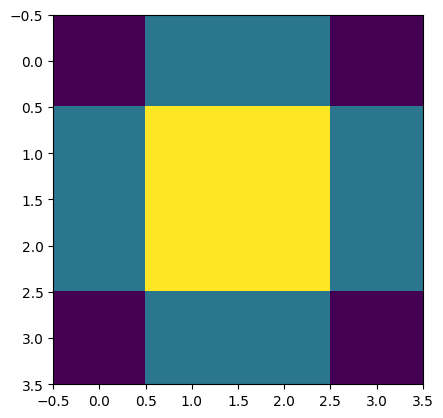

/home/druhe/miniconda3/envs/py310/lib/python3.10/site-packages/torch/nn/functional.py:3769: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


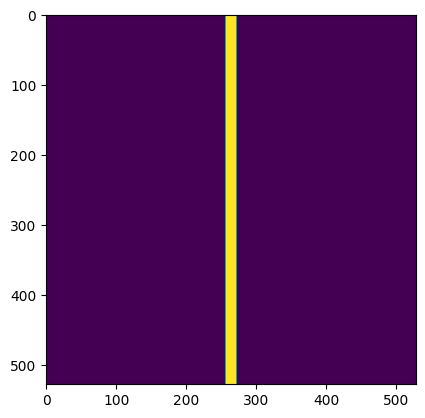

/home/druhe/miniconda3/envs/py310/lib/python3.10/site-packages/torch/nn/functional.py:4358: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


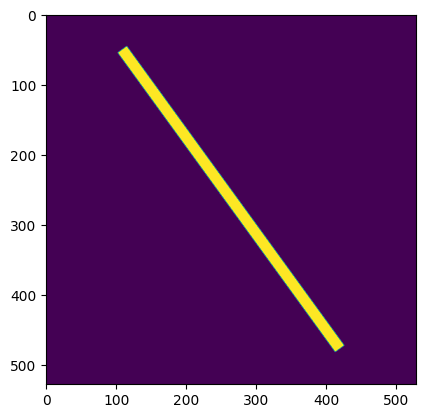

tensor(1.0040)


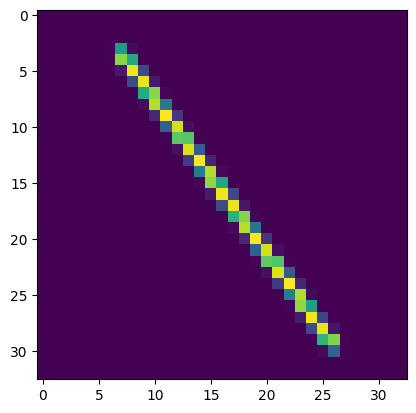

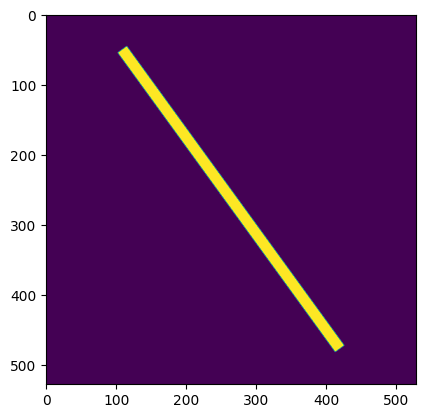

In [47]:
def rotate_image(image, radians):

    # pad the image with enough zeros so that the rotated patch does not get cropped
    # padding = math.ceil(image.shape[0] * (math.sqrt(2) - 1) / 2)
    # image = torch.nn.functional.pad(image, (padding, padding, padding, padding))

    theta = torch.tensor([
        [math.cos(radians), -math.sin(radians), 0],
        [math.sin(radians), math.cos(radians), 0]
    ])

    grid = torch.nn.functional.affine_grid(theta[None], image.size())
    rotated_image = torch.nn.functional.grid_sample(image, grid, align_corners=False, mode='bilinear')
    return rotated_image



def t_linspace(size):
    if size % 2 == 0:
        half_size = (size - 1) // 2
        return torch.linspace(-half_size, half_size, steps=size)
    else:
        half_size = size // 2
        return torch.linspace(-half_size, half_size, steps=size)


def gaussian_kernel(size, sigma=1):
    linspace = t_linspace(size)
    x, y = torch.meshgrid(linspace, linspace)

    gaussian = torch.exp(-(x**2 + y**2) / (2 * sigma**2))

    gaussian /= torch.sum(gaussian)

    return gaussian

k = gaussian_kernel(4, sigma=1)


# k = torch.ones_like(k) / k.sum()

k /= k.sum()

plt.imshow(k)
plt.show()



upsampled_patch = patch[None, None]
k = k[None, None]
# upsampled_patch = F.conv_transpose2d(upsampled_patch, k, stride=2)
# upsampled_patch = F.conv_transpose2d(upsampled_patch, k, stride=2, padding=1)
# upsampled_patch = F.conv_transpose2d(upsampled_patch, k, stride=2, padding=1)
# upsampled_patch = F.conv_transpose2d(upsampled_patch, k, stride=2, padding=1)
upsampled_patch = F.upsample(upsampled_patch, scale_factor=2, mode='nearest')
upsampled_patch = F.upsample(upsampled_patch, scale_factor=2, mode='nearest')
upsampled_patch = F.upsample(upsampled_patch, scale_factor=2, mode='nearest')
upsampled_patch = F.upsample(upsampled_patch, scale_factor=2, mode='nearest')

plt.imshow(upsampled_patch[0, 0])
plt.show()


rotated_patch = rotate_image(upsampled_patch, torch.pi / 5)

plt.imshow(rotated_patch[0, 0])
plt.show()

k = gaussian_kernel(5, sigma=0.5)[None, None]
# k = torch.ones_like(k)
# k /= k.sum()

downsampled_patch = rotated_patch

downsampled_patch = F.conv2d(downsampled_patch, k, stride=2, padding=2)
downsampled_patch = F.conv2d(downsampled_patch, k, stride=2, padding=2)
downsampled_patch = F.conv2d(downsampled_patch, k, stride=2, padding=2)
downsampled_patch = F.conv2d(downsampled_patch, k, stride=2, padding=2)
# downsampled_patch = F.interpolate(downsampled_patch, scale_factor=0.5, mode='bilinear')
# downsampled_patch = F.interpolate(downsampled_patch, scale_factor=0.5, mode='bilinear')
# downsampled_patch = F.interpolate(downsampled_patch, scale_factor=0.5, mode='bilinear')
# downsampled_patch = F.interpolate(downsampled_patch, scale_factor=0.5, mode='bilinear')

print(downsampled_patch.sum() / patch.sum())

plt.imshow(downsampled_patch[0, 0])
plt.show()


plt.imshow(rotated_patch[0, 0])
# plt.imshow(rotated_patch)


In [172]:
def gaussian_kernel(size, sigma=1):
    x, y = torch.meshgrid(torch.arange(size), torch.arange(size))
    x = x - size // 2
    y = y - size // 2

    gaussian = torch.exp(-(x**2 + y**2) / (2 * sigma**2))

    gaussian /= torch.sum(gaussian)

    return gaussian

k = gaussian_kernel(3, sigma=1)

In [173]:
k

tensor([[0.0751, 0.1238, 0.0751],
        [0.1238, 0.2042, 0.1238],
        [0.0751, 0.1238, 0.0751]])

In [104]:
downsampled_patch.sum()

tensor(1.0170)

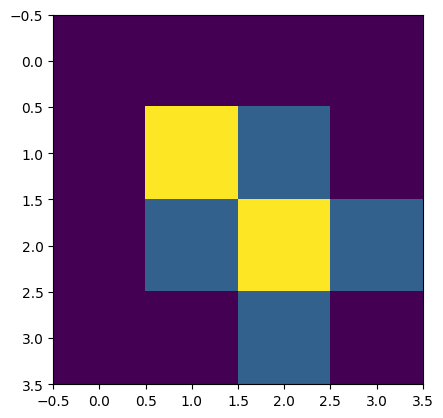

In [105]:
plt.imshow(downsampled_patch)